In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Library

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Read the CSV file with a comma delimiter
df = pd.read_csv('/content/drive/MyDrive/praktikum_ml/praktikum05/data/stunting_wasting_dataset.csv')

# Cetak header data (5 baris pertama) dari file
display(df.head())

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis Kelamin      100000 non-null  object 
 1   Umur (bulan)       100000 non-null  int64  
 2   Tinggi Badan (cm)  100000 non-null  float64
 3   Berat Badan (kg)   100000 non-null  float64
 4   Stunting           100000 non-null  object 
 5   Wasting            100000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ MB


Data Preprocessing

In [73]:
#cek missing value
df.isnull().sum()

,0
Jenis Kelamin,0
Umur (bulan),0
Tinggi Badan (cm),0
Berat Badan (kg),0
Stunting,0
Wasting,0


In [74]:
#cek duplicate
df.duplicated().sum()

#menghapus data duplikat
df = df.drop_duplicates()

#cek duplicate ulang setelah menghapus
df.duplicated().sum()

np.int64(0)

In [75]:
df = df.rename(columns={
    'Jenis Kelamin': 'jenis_kelamin',
    'Umur (bulan)': 'umur_bulan',
    'Tinggi Badan (cm)': 'tinggi_cm',
    'Berat Badan (kg)': 'berat_kg',
    'Stunting': 'stunting',
    'Wasting': 'wasting'
})


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92692 entries, 0 to 99997
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   jenis_kelamin  92692 non-null  object 
 1   umur_bulan     92692 non-null  int64  
 2   tinggi_cm      92692 non-null  float64
 3   berat_kg       92692 non-null  float64
 4   stunting       92692 non-null  object 
 5   wasting        92692 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 5.0+ MB


Data Understanding (Exploratory Data Analysis)

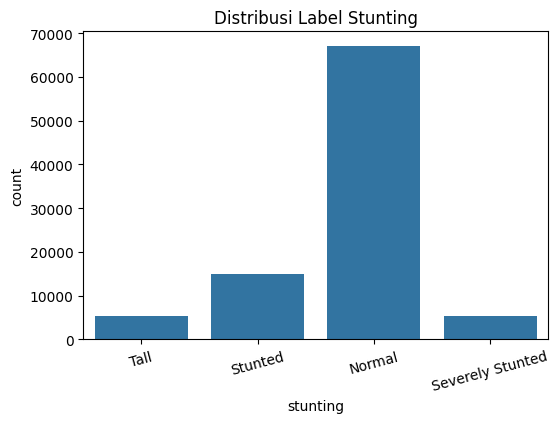

In [77]:
plt.figure(figsize=(6, 4))
sns.countplot(x='stunting', data=df)
plt.title('Distribusi Label Stunting')
plt.xticks(rotation=15)
plt.show()


Encoding Data Kategorikal (Mapping Label ke Kode Numerik)

In [78]:
# mapping label -> kode untuk target
stunting_cat = df['stunting'].astype('category')
stunting_classes = list(stunting_cat.cat.categories)

# urutan kelas
df['stunting'] = stunting_cat.cat.codes # y numerik

# fitur kategorikal lain (jenis_kelamin, wasting) kode juga
for col in ['jenis_kelamin', 'wasting']:
    if col in df.columns:
        df[col] = df[col].astype('category').cat.codes

df.head()


,jenis_kelamin,umur_bulan,tinggi_cm,berat_kg,stunting,wasting
0,0,19,91.6,13.3,3,1
1,0,20,77.7,8.5,2,3
2,0,10,79.0,10.3,0,1
3,1,2,50.3,8.3,1,1
4,1,5,56.4,10.9,1,1


Analisis Korelasi Antar Fitur

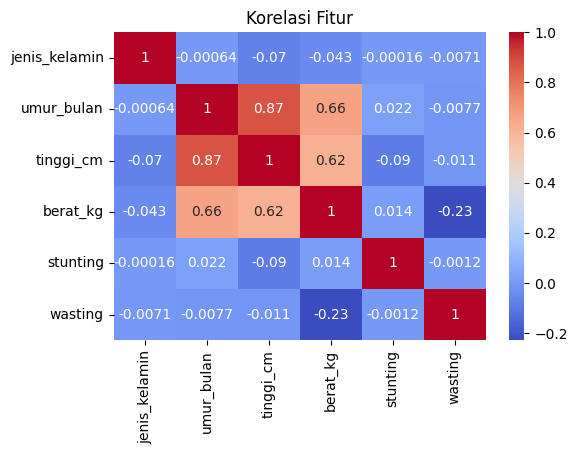

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Korelasi
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur')
plt.show()


Splitting Data (Pembagian Data Training dan Testing)

In [80]:
# Memilih fitur dan target
feature_cols = ['umur_bulan', 'tinggi_cm', 'berat_kg', 'wasting']
X = df[feature_cols]
y = df['stunting']

# Membagi dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

len(X_train), len(X_test)


(74153, 18539)

In [81]:
# Membangun model
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=42
)

dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

Evaluasi Model Decision Tree

In [82]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluasi
y_pred = dt.predict(X_test)

print("Akurasi:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Akurasi: 77.67 %

Confusion Matrix:
 [[12901     0   481    29]
 [  587    25   455     0]
 [ 1653     0  1355     0]
 [  935     0     0   118]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.96      0.88     13411
           1       1.00      0.02      0.05      1067
           2       0.59      0.45      0.51      3008
           3       0.80      0.11      0.20      1053

    accuracy                           0.78     18539
   macro avg       0.80      0.39      0.41     18539
weighted avg       0.78      0.78      0.73     18539



Visualisasi Hasil Model Decision Tree

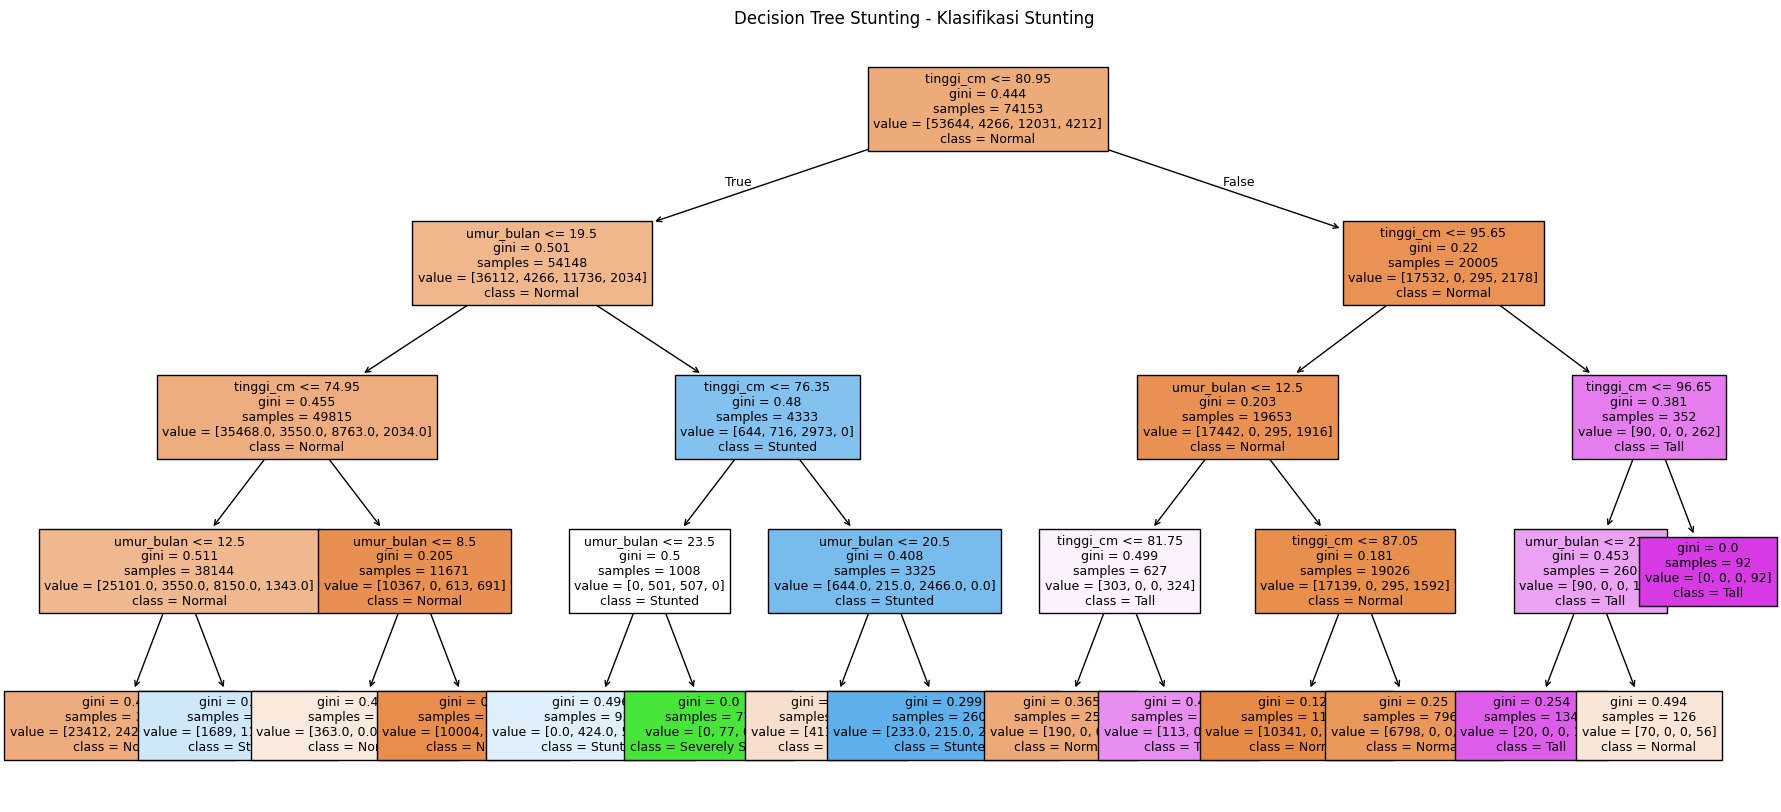

In [83]:
plt.figure(figsize=(22,10))
plot_tree(
    dt,
    feature_names=feature_cols,
    class_names=stunting_classes,
    filled=True,
    fontsize=9
)
plt.title('Decision Tree Stunting - Klasifikasi Stunting')
plt.show()

Feature Importance (Fitur yang Paling Berpengaruh)

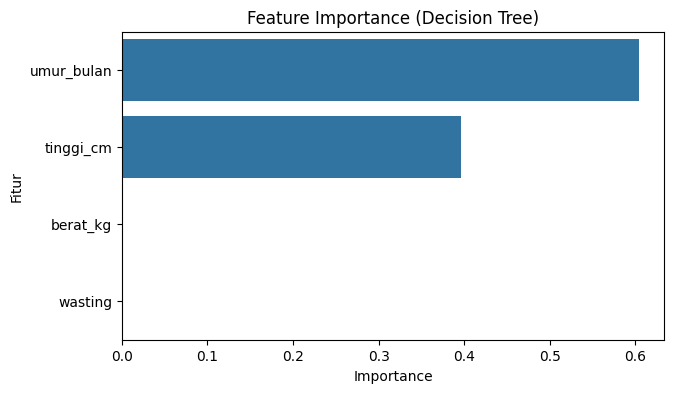

,0
umur_bulan,0.603752
tinggi_cm,0.396248
berat_kg,0.000000
wasting,0.000000


In [84]:
# Fitur yang penting
imp = pd.Series(dt.feature_importances_, index=feature_cols).sort_values(ascending=False)

plt.figure(figsize=(7, 4))
sns.barplot(x=imp, y=imp.index)

plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Fitur")
plt.show()

imp


Hyperparameter Tuning (Menentukan max_depth Terbaik)

In [85]:
# Mencari nilai max_depth terbaik
scores = {}

for d in range(2, 9):  # dari depth 2 sampai 8
    m = DecisionTreeClassifier(max_depth=d, random_state=42)
    m.fit(X_train, y_train)
    scores[d] = accuracy_score(y_test, m.predict(X_test))

scores

best_d = max(scores, key=scores.get)
print("Best max_depth:", best_d, "| Acc:", round(scores[best_d] * 100, 2), "%")


Best max_depth: 8 | Acc: 84.22 %


Praktikum Mandiri Dataset Iris.csv

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Read the CSV file with a comma delimiter
df = pd.read_csv('/content/drive/MyDrive/praktikum_ml/praktikum05/data/Iris.csv')

# Cetak header data (5 baris pertama) dari file
display(df.head())

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Mengecek Informasi dan Nilai Kosong

In [88]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


Memisahkan Fitur dan Target

In [89]:
feature_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = df[feature_cols]
y = df['Species']


Membagi Dataset (Training dan Testing)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

Membangun Model Decision Tree

In [91]:
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=42
)
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

Evaluasi Model

In [92]:
y_pred = dt.predict(X_test)

print("Akurasi:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Akurasi: 93.33 %

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



Visualisasi Model Decision Tree

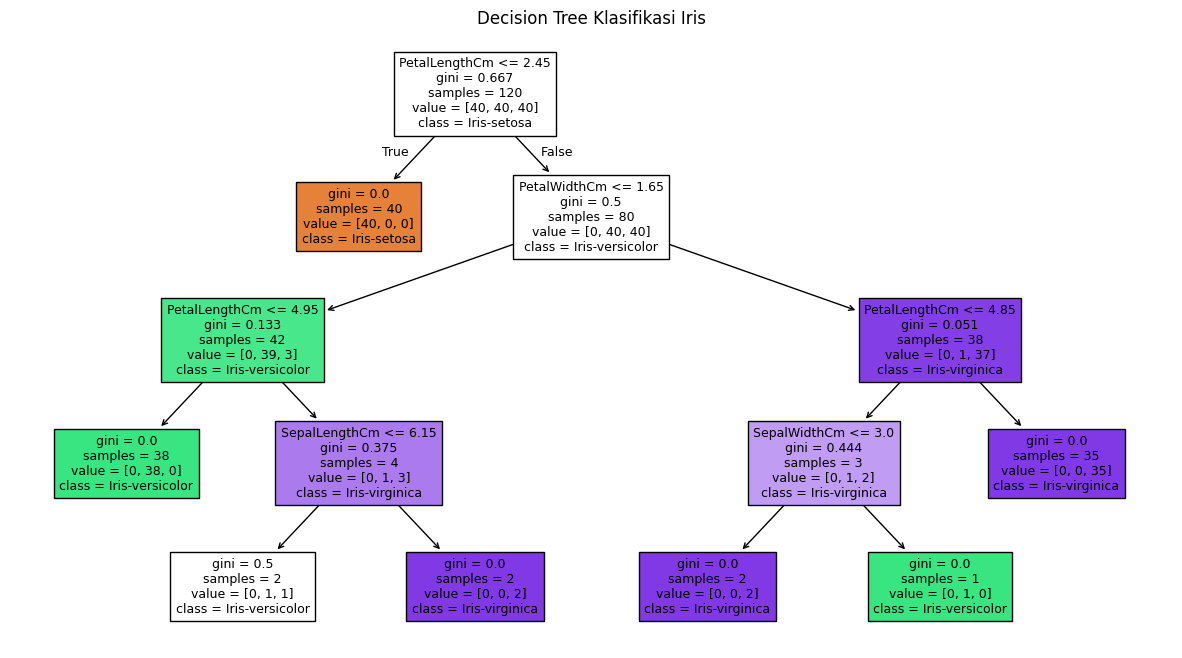

In [93]:
plt.figure(figsize=(15, 8))
plot_tree(dt, feature_names=feature_cols, class_names=dt.classes_, filled=True, fontsize=9)
plt.title("Decision Tree Klasifikasi Iris")
plt.show()


Menampilkan Pentingnya Fitur (Feature Importance)

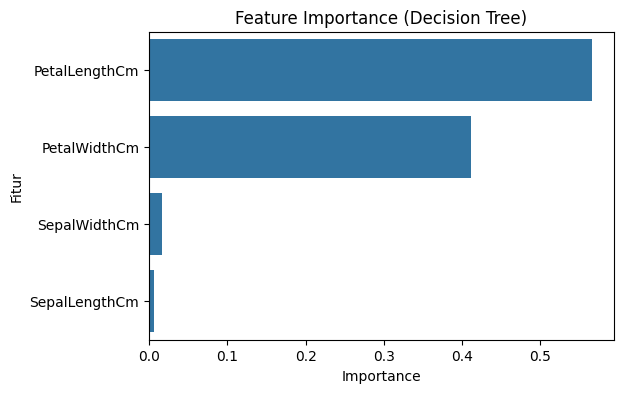

In [94]:
imp = pd.Series(dt.feature_importances_, index=feature_cols).sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=imp, y=imp.index)
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Fitur")
plt.show()
